In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def readdata(file):
    pd.set_option('display.max_columns', None)
    dataframe = pd.read_csv(file)
    return dataframe

In [5]:
dataframe = readdata('train_logistic_regression.csv')
dataframe

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
572,0,3,Mr. George Patchett,male,19.0,0,0,14.5000
573,1,2,Miss. Ethel Garside,female,34.0,0,0,13.0000
574,1,1,Mrs. William Baird (Alice Munger) Silvey,female,39.0,1,0,55.9000
575,0,3,Mrs. Joseph (Maria Elias) Caram,female,18.0,1,0,14.4583


In [6]:
def preprocessing(dataframe):
    dataframe = dataframe.drop('Name', axis=1)
    dataframe = pd.get_dummies(dataframe, columns=['Sex'], prefix='Sex').astype(int)
    return dataframe

In [7]:
dataframe = preprocessing(dataframe)
dataframe

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Sex_female,Sex_male
0,0,3,22,1,0,7,0,1
1,1,1,38,1,0,71,1,0
2,1,3,26,0,0,7,1,0
3,1,1,35,1,0,53,1,0
4,0,3,35,0,0,8,0,1
...,...,...,...,...,...,...,...,...
572,0,3,19,0,0,14,0,1
573,1,2,34,0,0,13,1,0
574,1,1,39,1,0,55,1,0
575,0,3,18,1,0,14,1,0


In [8]:
def scaledata(dataframe):
    target_column = dataframe['Survived']
    means = dataframe.iloc[:, :-1].mean()
    standard_deviations = dataframe.iloc[:, :-1].std()
    scaled_dataframe = (dataframe.iloc[:, :-1] - means) / standard_deviations
    scaled_dataframe['Survived'] = target_column

    return scaled_dataframe

In [9]:
scaled_dataframe = scaledata(dataframe)
scaled_dataframe

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Sex_female
0,0,0.826213,-0.515131,0.406014,-0.482881,-0.523648,-0.775715
1,1,-1.569390,0.610743,0.406014,-0.482881,0.843137,1.286900
2,1,0.826213,-0.233663,-0.491573,-0.482881,-0.523648,1.286900
3,1,-1.569390,0.399641,0.406014,-0.482881,0.458729,1.286900
4,0,0.826213,0.399641,-0.491573,-0.482881,-0.502292,-0.775715
...,...,...,...,...,...,...,...
572,0,0.826213,-0.726232,-0.491573,-0.482881,-0.374156,-0.775715
573,1,-0.371588,0.329274,-0.491573,-0.482881,-0.395512,1.286900
574,1,-1.569390,0.681110,0.406014,-0.482881,0.501441,1.286900
575,0,0.826213,-0.796600,0.406014,-0.482881,-0.374156,1.286900


In [10]:
target_column = scaled_dataframe['Survived']
features = scaled_dataframe.iloc[:, :-1].to_numpy()
targets = target_column.to_numpy()
print(features)
print(targets)

[[ 0.          0.8262132  -0.51513113  0.40601431 -0.48288082 -0.52364801]
 [ 1.         -1.5693899   0.61074259  0.40601431 -0.48288082  0.84313696]
 [ 1.          0.8262132  -0.2336627  -0.49157288 -0.48288082 -0.52364801]
 ...
 [ 1.         -1.5693899   0.6811097   0.40601431 -0.48288082  0.50144072]
 [ 0.          0.8262132  -0.79659956  0.40601431 -0.48288082 -0.37415591]
 [ 1.          0.8262132   0.18853995 -0.49157288 -0.48288082 -0.52364801]]
[0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1
 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0
 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0
 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 1
 1 0 0 0 0 0 1 1 1 

In [17]:
def accuracyratio(prediction, targets):
    prediction = (prediction > 0.5).astype(int)
    accuracy = (np.sum(prediction == targets) / len(targets)) * 100

    return accuracy

In [49]:
def gradient_descent(features, targets, learning_rate=0.1, epochs=250):
    weights = np.zeros(features.shape[1])
    bias = 0

    accuracy = np.empty(epochs)

    for iternum in range(epochs):
        polynomial = np.dot(features, weights) + bias
        prediction = 1 / (1 + np.exp(-polynomial))

        accuracy[iternum] = accuracyratio(prediction, targets)

        weight_gradient = np.dot(features.T, (prediction - targets)) / len(features)
        bias_gradient = np.sum(prediction - targets) / len(features)

        weights = weights - learning_rate * weight_gradient
        bias = bias - learning_rate * bias_gradient

    return weights, bias, accuracy

In [50]:
weights, bias, accuracy = gradient_descent(features, targets)
print(weights)
print(bias)

[ 2.85546484 -0.42753413 -0.32156538 -0.19593083  0.09485115  0.07583798]
-1.46049542515739


In [51]:
def graphing(accuracy):
    epoch = range(len(accuracy))

    plt.plot(epoch, accuracy, label='Accuracy vs Epoch')
    plt.title('Accuracy vs Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

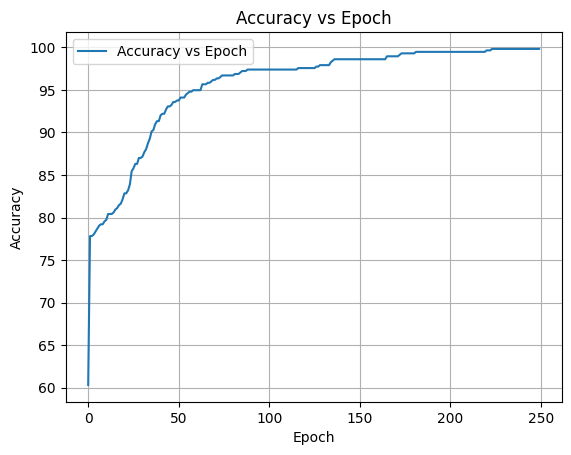

In [52]:
graphing(accuracy)

In [53]:
testingframe = readdata('test_logistic_regression.csv')
testingframe

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,1,2,Miss. Julie Rachel Christy,female,25.0,1,1,30.0000
1,1,1,Mrs. John Borland (Marian Longstreth Morris) T...,female,39.0,1,1,110.8833
2,0,2,Mr. William James Downton,male,54.0,0,0,26.0000
3,0,1,Mr. John Hugo Ross,male,36.0,0,0,40.1250
4,0,3,Mr. Uscher Paulner,male,16.0,0,0,8.7125
...,...,...,...,...,...,...,...,...
305,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
306,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
307,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
308,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


In [54]:
testingframe = preprocessing(testingframe)
testingframe

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Sex_female,Sex_male
0,1,2,25,1,1,30,1,0
1,1,1,39,1,1,110,1,0
2,0,2,54,0,0,26,0,1
3,0,1,36,0,0,40,0,1
4,0,3,16,0,0,8,0,1
...,...,...,...,...,...,...,...,...
305,0,2,27,0,0,13,0,1
306,1,1,19,0,0,30,1,0
307,0,3,7,1,2,23,1,0
308,1,1,26,0,0,30,0,1


In [55]:
scaled_testingframe = scaledata(testingframe)
scaled_testingframe

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Sex_female
0,1,-0.352764,-0.336252,0.474615,0.701947,-0.046836,1.479457
1,1,-1.541425,0.663977,0.474615,0.701947,1.408730,1.479457
2,0,-0.352764,1.735651,-0.444952,-0.461709,-0.119615,-0.673743
3,0,-1.541425,0.449642,-0.444952,-0.461709,0.135109,-0.673743
4,0,0.835897,-0.979256,-0.444952,-0.461709,-0.447117,-0.673743
...,...,...,...,...,...,...,...
305,0,-0.352764,-0.193362,-0.444952,-0.461709,-0.356144,-0.673743
306,1,-1.541425,-0.764922,-0.444952,-0.461709,-0.046836,1.479457
307,0,0.835897,-1.622261,0.474615,1.865603,-0.174198,1.479457
308,1,-1.541425,-0.264807,-0.444952,-0.461709,-0.046836,-0.673743


In [56]:
target_column = scaled_testingframe['Survived']
features = scaled_testingframe.iloc[:, :-1].to_numpy()
targets = target_column.to_numpy()
print(features)
print(targets)

[[ 1.         -0.35276394 -0.33625206  0.47461532  0.70194713 -0.04683638]
 [ 1.         -1.54142504  0.66397681  0.47461532  0.70194713  1.40873035]
 [ 0.         -0.35276394  1.7356506  -0.44495187 -0.46170854 -0.11961472]
 ...
 [ 0.          0.83589716 -1.6222606   0.47461532  1.8656028  -0.17419847]
 [ 1.         -1.54142504 -0.26480714 -0.44495187 -0.46170854 -0.04683638]
 [ 0.          0.83589716  0.16386238 -0.44495187 -0.46170854 -0.46531182]]
[1 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1
 1 1 0 0 0 0 1 0 0 1 1 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 0
 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 1 0 0 1 1 0 1
 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1
 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 1 0 0 0 1 0 0 1 1
 0 0 1 0 0 0 0 0 0 

In [58]:
polynomial = np.dot(features, weights) + bias
predictions = 1 / (1 + np.exp(-polynomial))
print(f"{accuracyratio(predictions, targets)}%")

100.0%
